In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [17]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [18]:
import missingno as msno

In [19]:
data = pd.read_csv('C:/Users/hp/Downloads/Dune Sales Data.csv')

In [21]:
data.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [22]:
data.tail(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.shape

(34867, 12)

In [24]:
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [26]:
data.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [27]:
data.describe(include=['object','bool'])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [29]:
null_vals = data.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

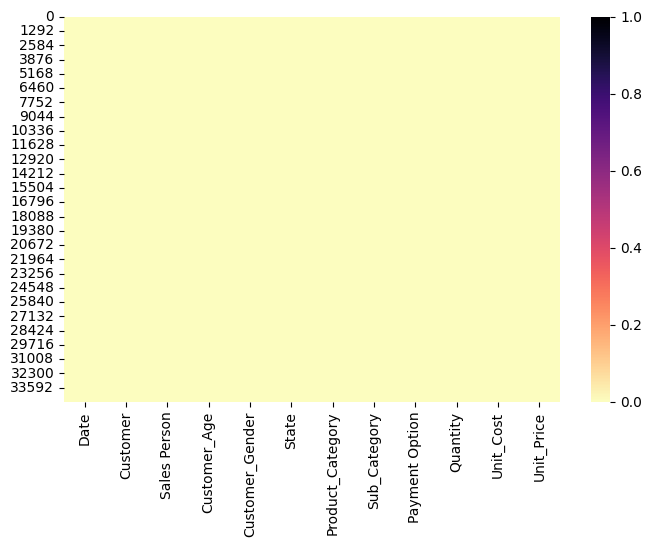

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cbar=True, cmap='magma_r');

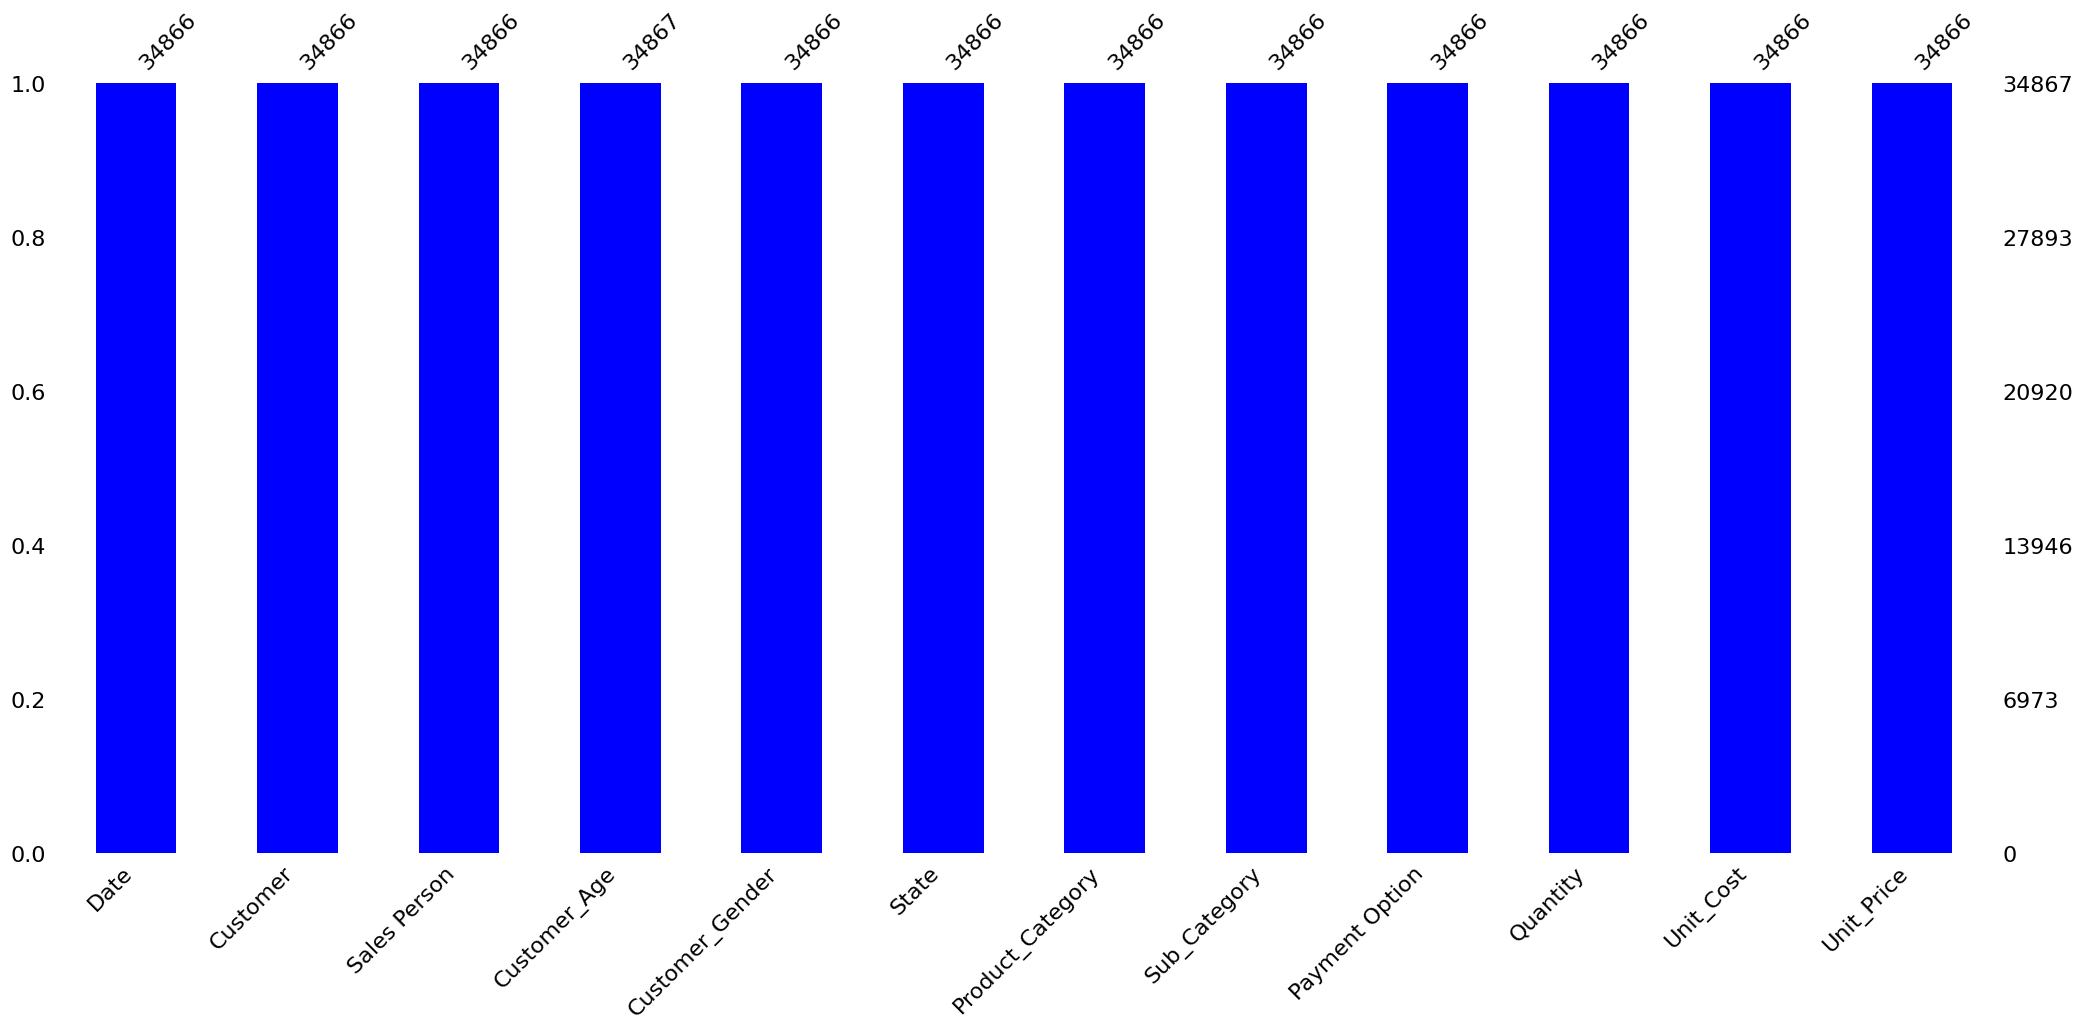

In [33]:
msno.bar(data, color='blue');

In [35]:
#display where the missing data exists
data[data.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data.dropna(inplace=True)

In [37]:
data.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [41]:
#Date - time analysis
#concert date column into a pandas datetime object
data.Date = pd.to_datetime(data.Date)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [43]:
#extract the year, month, quarter from the date
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['month_name'] = data['Date'].dt.month_name()
data['quarter'] = data['Date'].dt.quarter
data.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.5,2016,2,February,1
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.0,2016,2,February,1


In [44]:
# group customer age
def age_group(x):
    if x <= 25:
        return '<= 25 Young Adult'
    elif x <= 40:
        return '26 - 40 Adult'
    elif x <= 50:
        return '<= 41 - 50 Old Adult'
    else:
        return '>= 51 Elder'
    
# apply function to the the data
data['Age_gp'] = data['Customer_Age'].apply(age_group)
data.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,Age_gp
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.0,2016,2,February,1,26 - 40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.5,2016,2,February,1,26 - 40 Adult
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.0,2016,2,February,1,26 - 40 Adult


In [46]:
data['Cost'] = (data['Quantity'] * data['Unit_Cost'])
data['Revenue'] = (data['Quantity'] * data['Unit_Price'])
data['Profit/Loss'] = data['Revenue'] - data['Cost']
data.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,Age_gp,Profit/Loss,Cost,Revenue
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.0,2016,2,February,1,26 - 40 Adult,29.00,80.00,109.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.5,2016,2,February,1,26 - 40 Adult,8.00,49.00,57.0
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.0,2016,2,February,1,26 - 40 Adult,3.99,11.01,15.0


In [47]:
def profit_loss(x):
    if x > 0:
        return 'Profit'
    else:
        return 'Loss'
data['profit or loss'] = data['Profit/Loss'].apply(profit_loss)
data.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,Age_gp,Profit/Loss,Cost,Revenue,profit or loss
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,26 - 40 Adult,29.00,80.00,109.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,26 - 40 Adult,8.00,49.00,57.0,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.0,2016,2,February,1,26 - 40 Adult,3.99,11.01,15.0,Profit


univarite analysis: involves analyzing the distribution and summary statistics of individual columns/features/variables

numerical column = numerical visualization technique
categorical column = categorical visualization technique

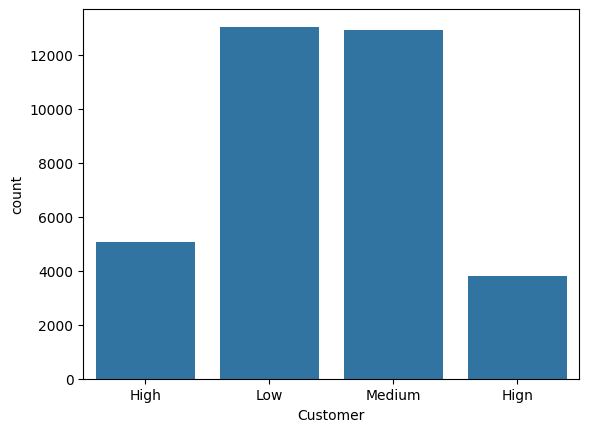

In [49]:
# how many customers belong to each customer spec
sns.countplot(x='Customer', data=data);

In [50]:
data[data['Customer'] == 'Hign'].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,Age_gp,Profit/Loss,Cost,Revenue,profit or loss
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,26 - 40 Adult,-159.0,2295.00,2136.00,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,26 - 40 Adult,4.0,35.00,39.00,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,26 - 40 Adult,6.0,50.01,56.01,Profit


In [54]:
data.loc[data['Customer'] == 'Hign', 'Customer'] = 'High'
data.Customer.value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

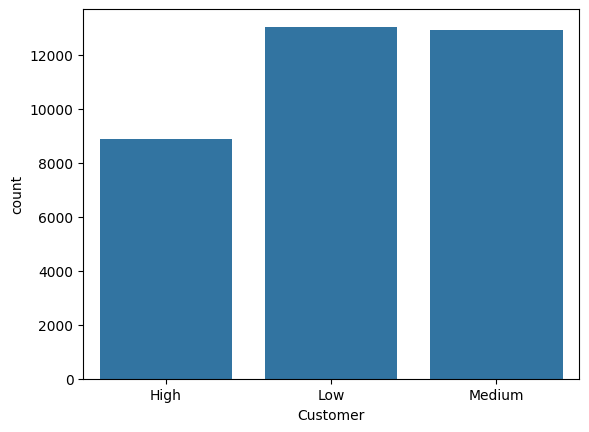

In [53]:
sns.countplot(x='Customer', data=data);

There are more customers in the "low" segment (13041) than in any other segment. This suggests that the organization has a larger number of customers with low spending habits.
There are more customers in the "medium" segment (12926) than in the "high" segment (8899). This suggests that the organization has a moderately larger number of customers with medium spending habits compared to those with high spending habits.

In [55]:
# how many transactions by sales person
label = data['Sales Person'].value_counts(ascending=False)
label

Sales Person
Remota      6667
Chinazam    6556
Feyisola    6129
Suleman     4618
Segun       3788
Derick      3712
Kenny       3396
Name: count, dtype: int64

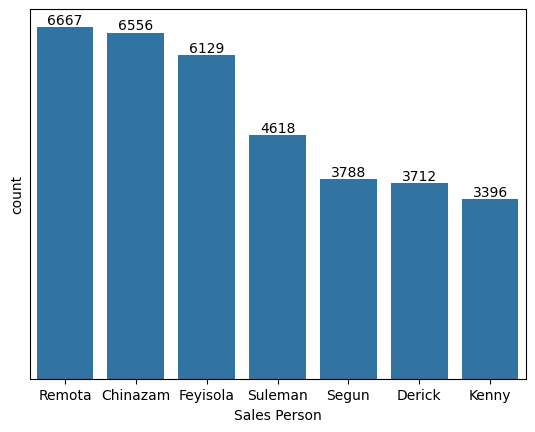

In [62]:
ax = sns.countplot(x=data['Sales Person'], order=label.index)
ax.bar_label(container=ax.containers[0], labels=label.values)
ax.yaxis.set_ticks([]);

Remota (6667) has the highest sales count while the lowest sales was made by kenny (3396).

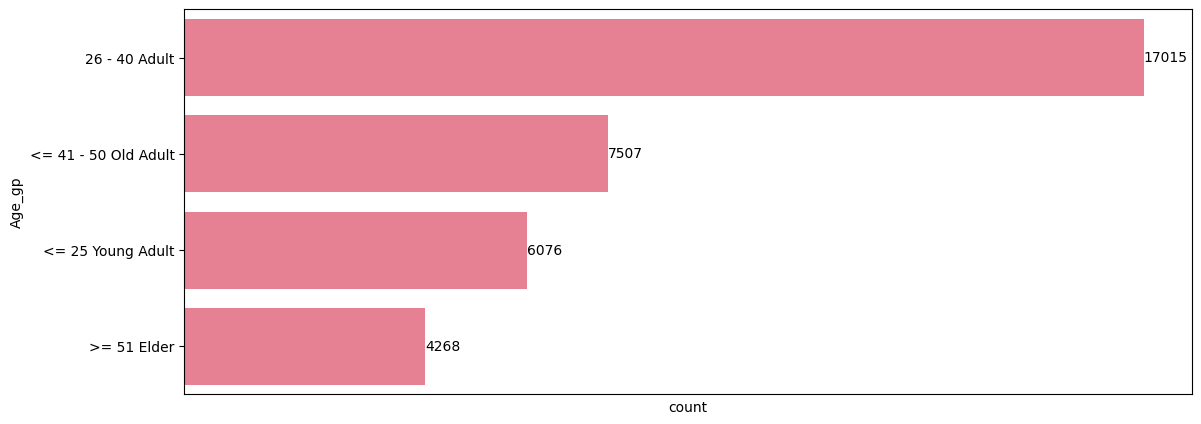

In [77]:
#total transactions by customer age group
plt.figure(figsize=(13, 5))
ax = sns.countplot(y=data['Age_gp'], order=data['Age_gp'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=data['Age_gp'].value_counts(ascending=False).values)
ax.xaxis.set_ticks([]);

The adult customer age group are the highest patronisers of the business with the lowest count of customer being the elderly customers. 

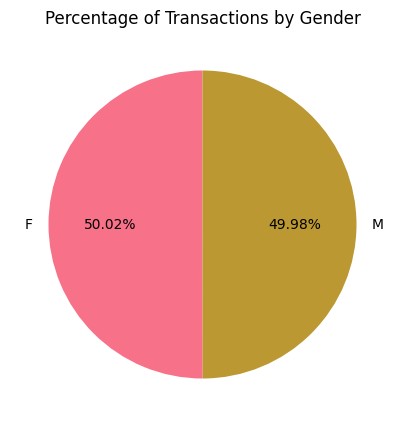

In [84]:
# total transactions by customer gender
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data['Customer_Gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%', startangle=90)
ax.set_title('Percentage of Transactions by Gender')
plt.show();

There is little difference between transaction by gender (difference of 0.04%), but overall, the female gender has the higher percentage of transaction.

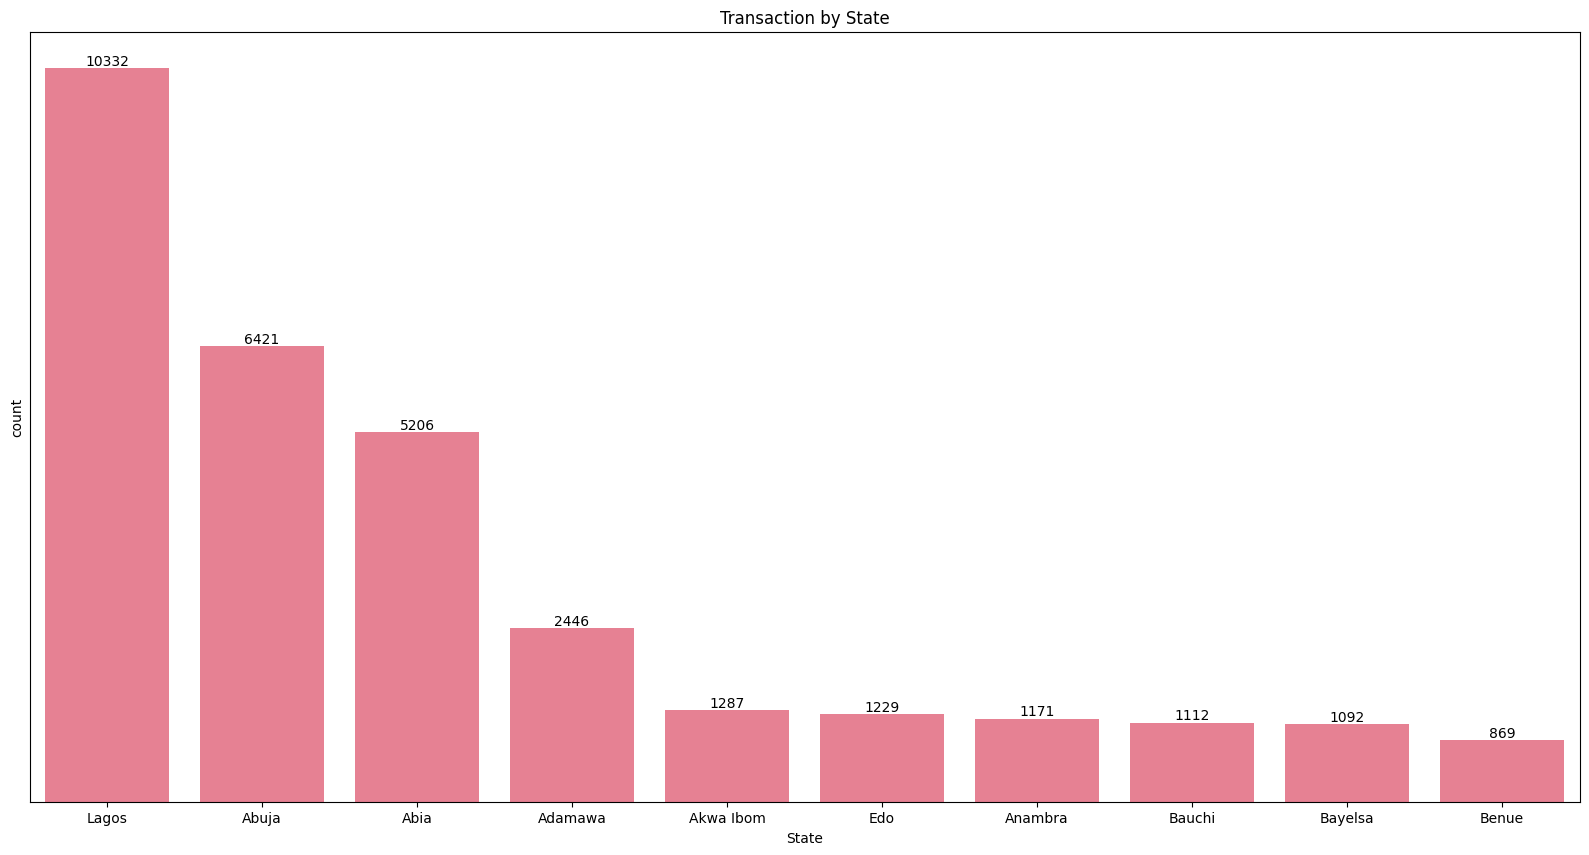

In [102]:
#total transaction by top 10 state
plt.figure(figsize=(20,10))
top_state = data['State'].value_counts().head(10)
ax = sns.countplot(x='State', data=data, order=top_state.index);
ax.bar_label(container=ax.containers[0], labels=top_state.values)
ax.set_title('Transaction by State')
ax.yaxis.set_ticks([]);

The top 3 state with the highest transaction count are: Lagos state (10332), Abuja (6421), and Abia (5206). Benue had the lowest transaction count (869).

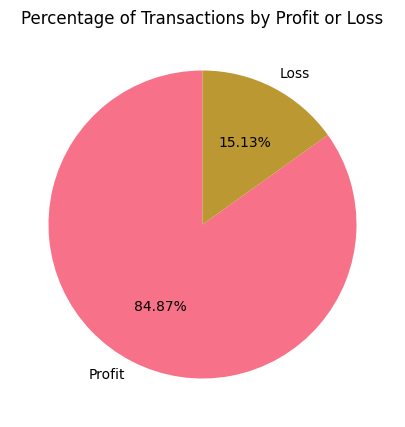

In [104]:
fig,ax = plt.subplots(figsize=(10,5))
count = Counter(data['profit or loss'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%', startangle=90)
ax.set_title('Percentage of Transactions by Profit or Loss')
plt.show();

85% of transaction recorded yielded a profit with only 15% of the transactions resulting in a loss.

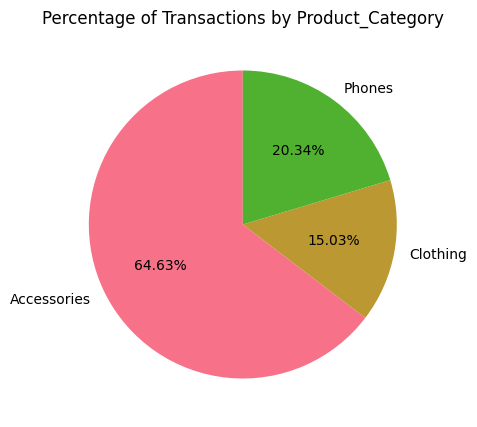

In [107]:
#'Sub_Category', 'Payment Option', 'year', 'month', 'month_name', 'quarter'
#total transactions by sub-category
data.Product_Category.value_counts()
fig,ax = plt.subplots(figsize=(10,5))
count = Counter(data['Product_Category'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%', startangle=90)
ax.set_title('Percentage of Transactions by Product_Category')
plt.show();

Accessories (65%) was the product category mostly purchased by customers, followed by phones (20%) and lastly clothing (15%).

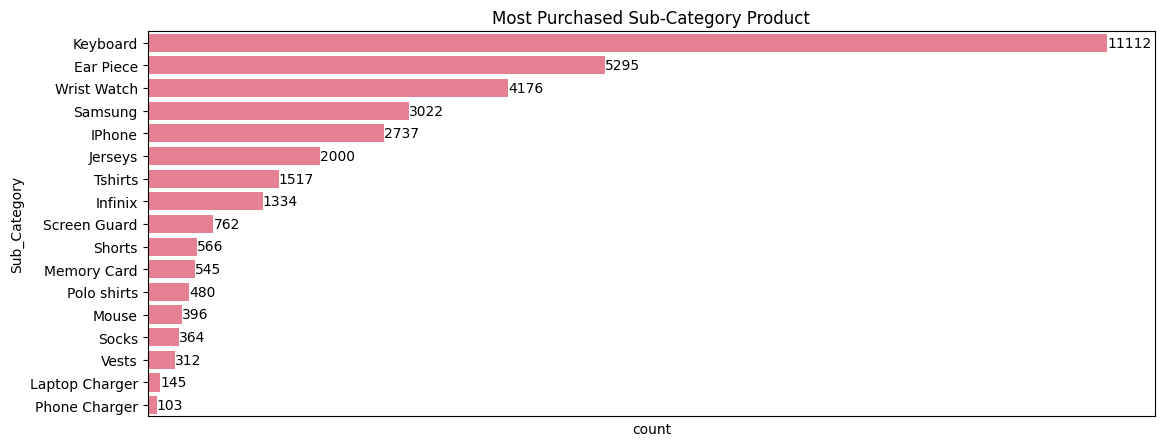

In [110]:
#'Sub_Category', 'Payment Option', 'year', 'month', 'month_name', 'quarter'
#total transactions by sub-category
plt.figure(figsize=(13, 5))
data.Sub_Category.value_counts()
ax = sns.countplot(y=data['Sub_Category'], order=data['Sub_Category'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=data['Sub_Category'].value_counts(ascending=False).values)
ax.set_title('Most Purchased Sub-Category Product')
ax.xaxis.set_ticks([]);

The 3 sub-category with the most purchases are: keyboard (11112), ear piece (5295) and wrist watch (4176). Phone charger is the sub category with the lowest purchases of 103.

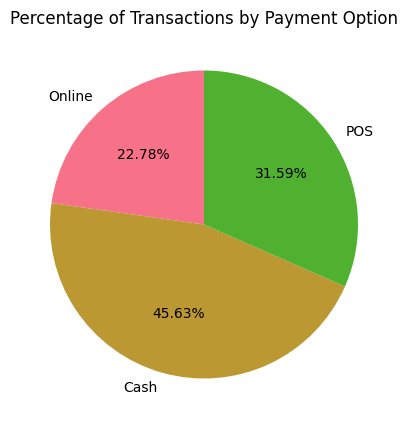

In [117]:
#'Payment Option', 'year', 'month', 'month_name', 'quarter'
#total transactions by Payment Option
data['Payment Option'].value_counts()
fig,ax = plt.subplots(figsize=(10,5))
count = Counter(data['Payment Option'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%', startangle=90)
ax.set_title('Percentage of Transactions by Payment Option')
plt.show();

Majority of the transactions were carried out via cash payment method (46%), follwed by POS (32%) and lastly online payment (23%).

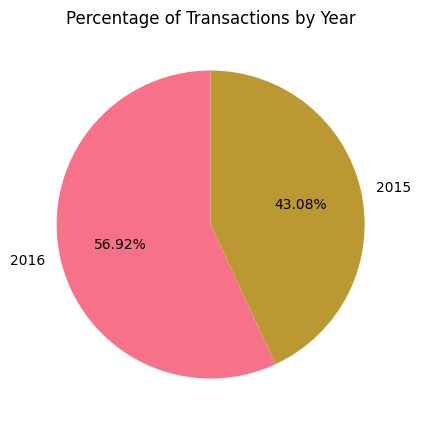

In [124]:
#total transactions by year
data['year'].value_counts()
fig,ax = plt.subplots(figsize=(10,5))
count = Counter(data['year'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%', startangle=90)
ax.set_title('Percentage of Transactions by Year')
plt.show();

More transactions were observed in the year 2016 (57%) than in 2015 (43%).

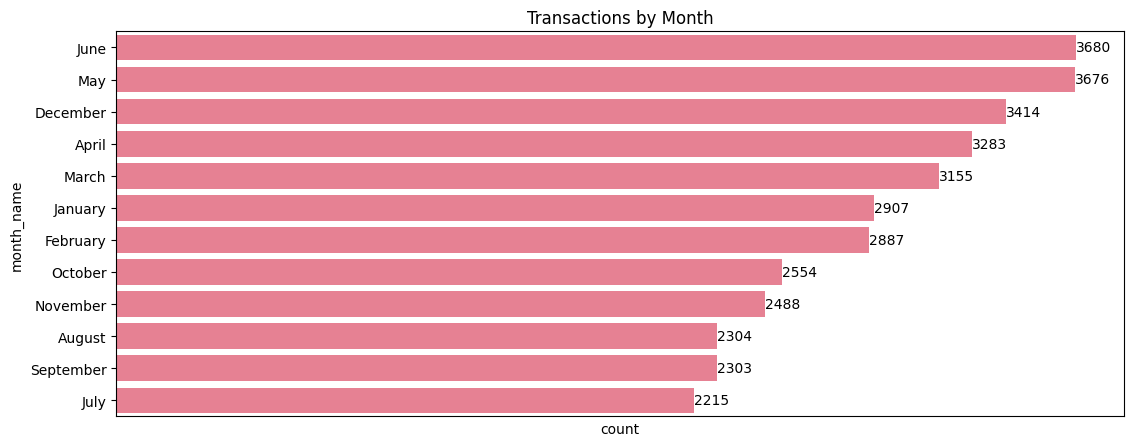

In [123]:
#total transactions by Month
data['month_name'].value_counts()
plt.figure(figsize=(13, 5))
ax = sns.countplot(y=data['month_name'], order=data['month_name'].value_counts().index)
ax.bar_label(container=ax.containers[0], labels=data['month_name'].value_counts().values)
ax.set_title('Transactions by Month')
ax.xaxis.set_ticks([]);

The highest transactions were observed in the month of June with the least transactions in the month of July. May, December and April were also in the top month with high transactions.

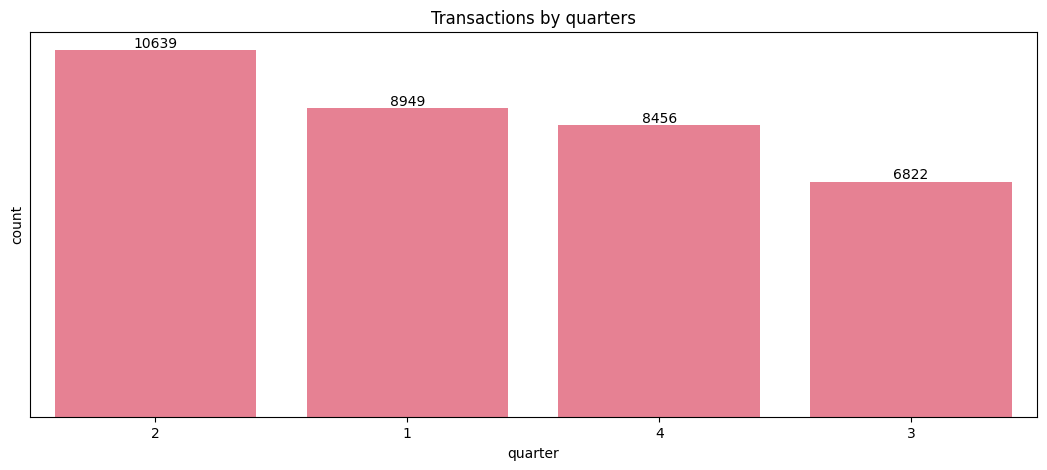

In [125]:
#total transactions by Quarter
data['quarter'].value_counts()
plt.figure(figsize=(13, 5))
ax = sns.countplot(x=data['quarter'], order=data['quarter'].value_counts().index)
ax.bar_label(container=ax.containers[0], labels=data['quarter'].value_counts().values)
ax.set_title('Transactions by quarters')
ax.yaxis.set_ticks([]);

The second quarter has the highest transactions followed by the first quarter. the least transaction was seen in th the third quarter of the year.

#### Numerical data visualization

In [131]:
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_gp', 'Profit/Loss', 'Cost', 'Revenue',
       'profit or loss'],
      dtype='object')

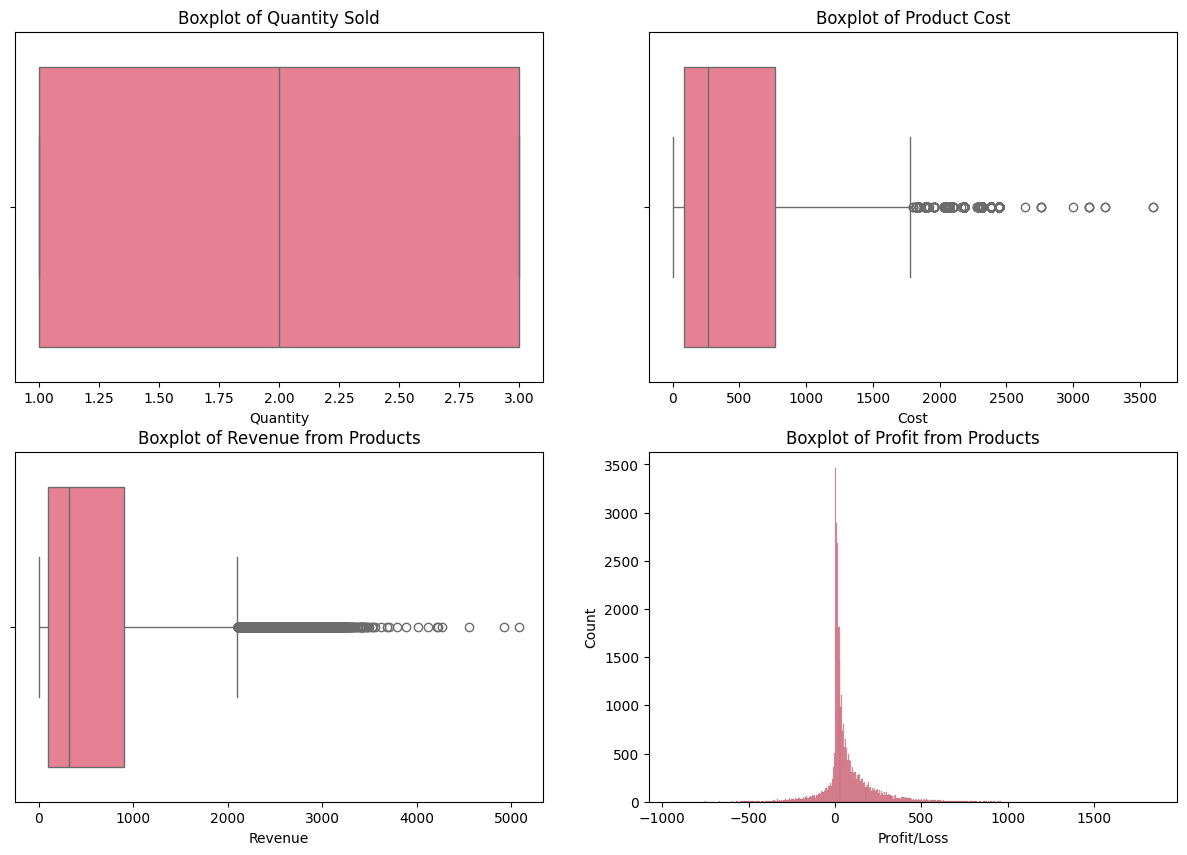

In [134]:
#Quantity, cost, revenue and profit
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x='Quantity', data=data, ax=axs[0,0])
axs[0,0].set_title('Boxplot of Quantity Sold')

sns.boxplot(x='Cost', data=data, ax=axs[0,1])
axs[0,1].set_title('Boxplot of Product Cost')

sns.boxplot(x='Revenue', data=data, ax=axs[1,0])
axs[1,0].set_title('Boxplot of Revenue from Products')

sns.histplot(x='Profit/Loss', data=data, ax=axs[1,1])
axs[1,1].set_title('Boxplot of Profit from Products');

Boxplot of quantity sold: The median quantity sold is around 1,500, with most values falling between 1,000 and 2,000. There are a few outliers, with some sales as high as 3,000 and as low as 500.

Boxplot of product cost: The median product cost is around $1750, with most values falling between $1,500 and $2000. There are a few outliers, with some costs as high as $3,000 and as low as $1000.

Boxplot of revenue from products: The median revenue from products is around $3000, with most values falling between $2000 and $4000. There are a few outliers, with some revenue as high as $5000 and as low as $1000.

Boxplot of profit from products: The median profit from products is around $500, with most values falling between $0 and $1000. There are a few outliers, with some profits as high as $1500 and as low as -$10000.

Overall, it appears that the company is selling a product that has a median cost of $1750 and a median selling price of $3000, resulting in a median profit of $500. However, there is a significant amount of variability in both the cost and selling price of the product, which means that the company's profits can vary considerably.

##### bivariate analysis involves analyzing the relationship between two variables

In [141]:
# focus on profit
data.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_gp', 'Profit/Loss', 'Cost', 'Revenue',
       'profit or loss'],
      dtype='object')

In [145]:
cust_profit = data.groupby('Customer')['Profit/Loss'].sum().reset_index()
cust_profit

,Customer,Profit/Loss
0,High,531134.37
1,Low,922094.10
2,Medium,808380.21


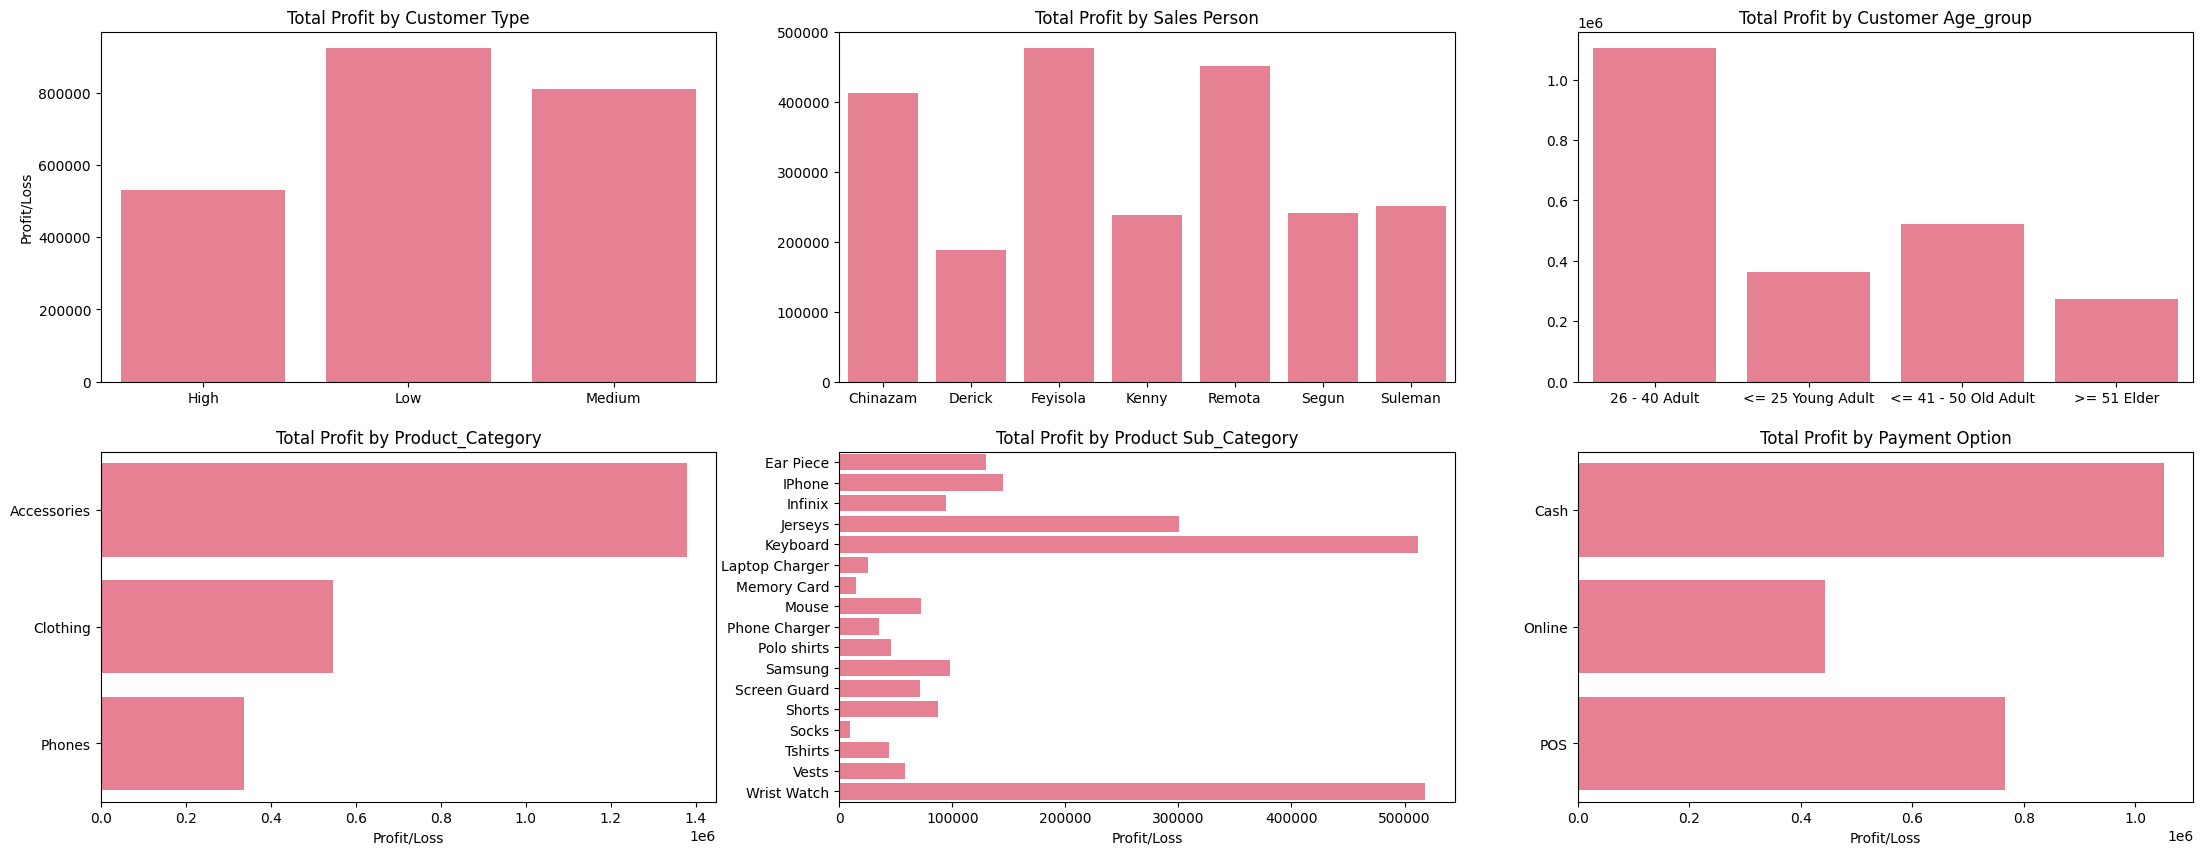

In [152]:
# bivariate analysis for categorical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

cust_profit = data.groupby('Customer')['Profit/Loss'].sum().reset_index()
sns.barplot(x='Customer', data=cust_profit, y='Profit/Loss', ax=axs[0,0])
axs[0,0].set_title('Total Profit by Customer Type')
axs[0,0].set_xlabel('')

pers_profit = data.groupby('Sales Person')['Profit/Loss'].sum().reset_index()
sns.barplot(x='Sales Person', data=pers_profit, y='Profit/Loss', ax=axs[0,1])
axs[0,1].set_title('Total Profit by Sales Person')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

age_profit = data.groupby('Age_gp')['Profit/Loss'].sum().reset_index()
sns.barplot(x='Age_gp', data=age_profit, y='Profit/Loss', ax=axs[0,2])
axs[0,2].set_title('Total Profit by Customer Age_group')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

pdt_profit = data.groupby('Product_Category')['Profit/Loss'].sum().reset_index()
sns.barplot(y='Product_Category', data=pdt_profit, x='Profit/Loss', ax=axs[1,0])
axs[1,0].set_title('Total Profit by Product_Category')
axs[1,0].set_ylabel('')

sub_profit = data.groupby('Sub_Category')['Profit/Loss'].sum().reset_index()
sns.barplot(y='Sub_Category', data=sub_profit, x='Profit/Loss', ax=axs[1,1])
axs[1,1].set_title('Total Profit by Product Sub_Category')
axs[1,1].set_ylabel('')

pay_profit = data.groupby('Payment Option')['Profit/Loss'].sum().reset_index()
sns.barplot(y='Payment Option', data=pay_profit, x='Profit/Loss', ax=axs[1,2])
axs[1,2].set_title('Total Profit by Payment Option')
axs[1,2].set_ylabel('');

Total Profit by Customer Age group: This chart shows that the highest total profit comes from customers aged 26-40, followed by customers aged 41-50 and then customers under 25. Customers over 51 years old generate the least profit.

Total Profit by Sales Person: This chart shows that Feyisola is the top salesperson in terms of total profit, followed by Remota and then Chinazam. Derrick generates the least profit.

Total Profit by Customer Type: Low-value customers generate the most profit, followed by medium and high-value customers.

Total Profit by Product Category: This chart shows that the highest total profit comes from the Accessories, followed by Clothing and then Phone category.

Total Profit by Product Sub Category: This chart shows that the highest total profit comes from the keyboard and wrist watch, followed by jerseys. The least profit comes from socks and memory cards.

Total Profit by Payment Option: This chart shows that the highest total profit comes from cash payments, followed by POS and then online.

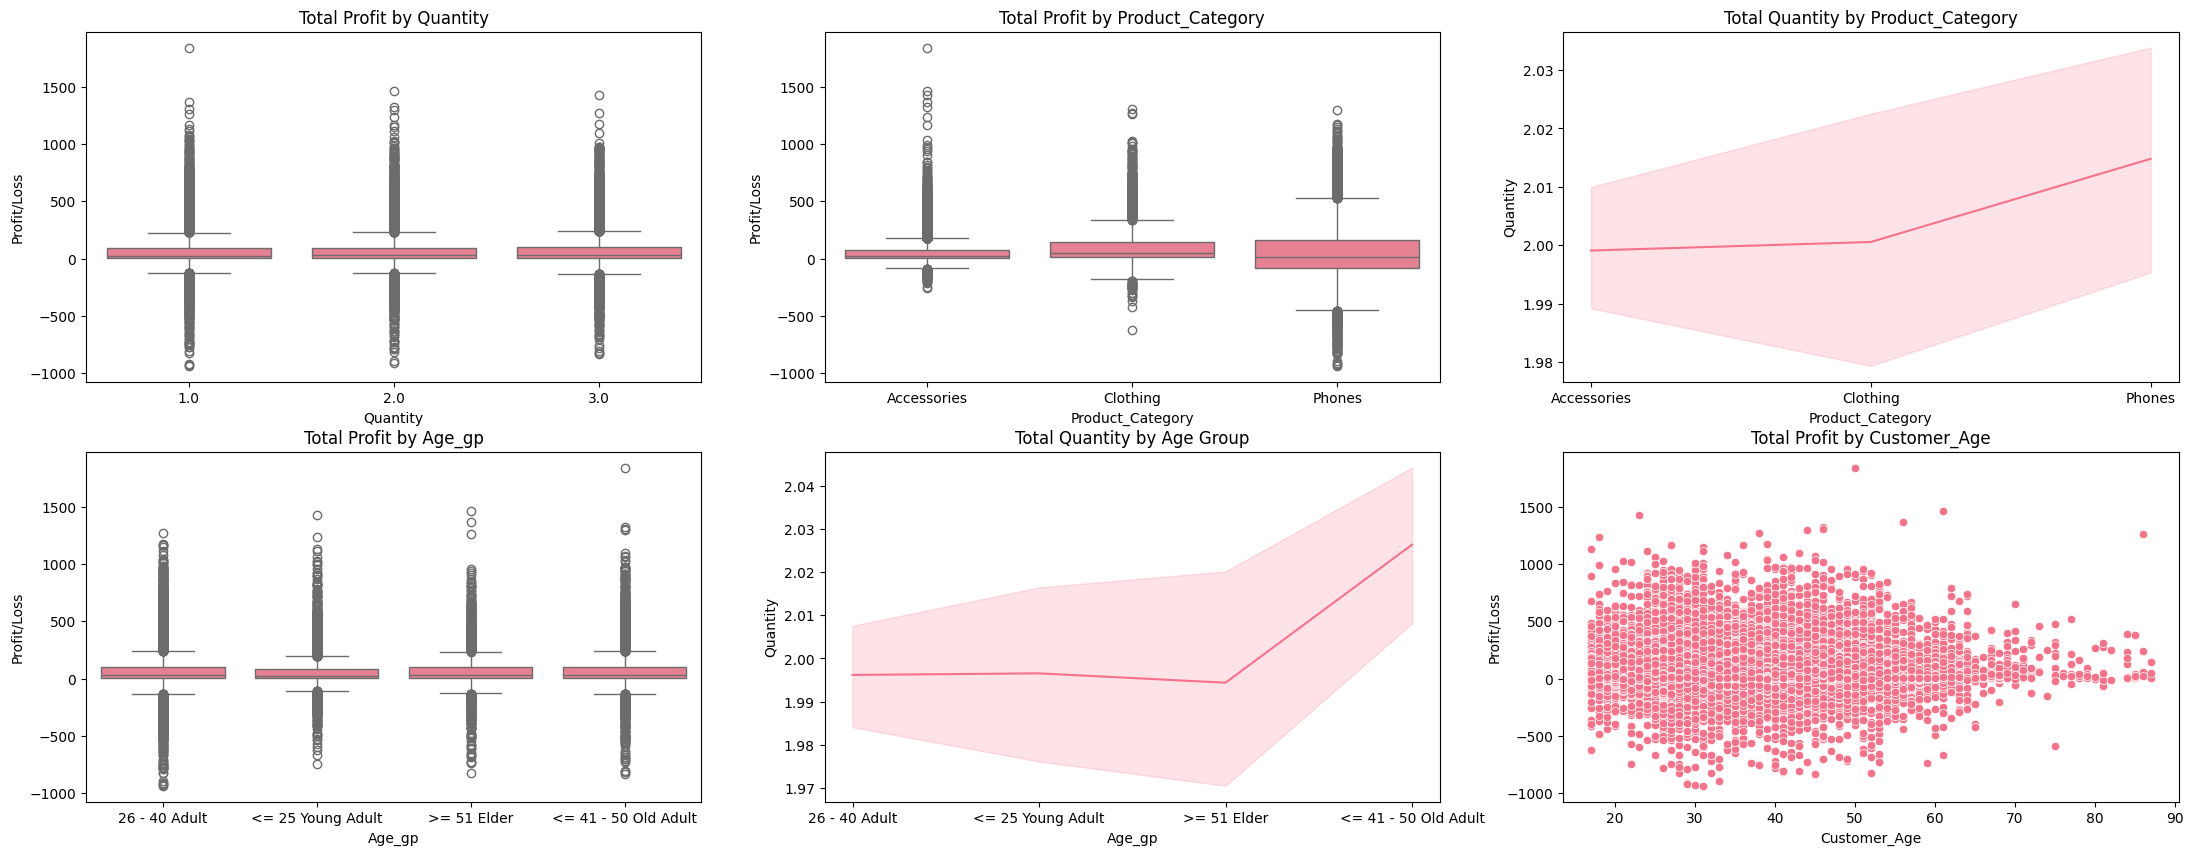

In [165]:
# bivariate analysis for numerical variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.boxplot(x='Quantity', data=data, y='Profit/Loss', ax=axs[0,0])
axs[0,0].set_title('Total Profit by Quantity')

sns.boxplot(x='Product_Category', data=data, y='Profit/Loss', ax=axs[0,1])
axs[0,1].set_title('Total Profit by Product_Category')

sns.lineplot(y='Quantity', data=data, x='Product_Category', ax=axs[0,2])
axs[0,2].set_title('Total Quantity by Product_Category')

sns.boxplot(x='Age_gp', data=data, y='Profit/Loss', ax=axs[1,0])
axs[1,0].set_title('Total Profit by Age_gp')

sns.lineplot(y='Quantity', data=data, x='Age_gp', ax=axs[1,1])
axs[1,1].set_title('Total Quantity by Age Group')

sns.scatterplot(x='Customer_Age', data=data, y='Profit/Loss', ax=axs[1,2])
axs[1,2].set_title('Total Profit by Customer_Age');

There appears to be a positive correlation between quantity sold and total profit. As the quantity sold increases, the total profit also increases. This suggests that the company benefits from economies of scale, where the cost per unit decreases as production increases. There seems to be a drop in profit around the 1500 quantity mark

There appears to be a negative correlation between customer age and total profit. As the customer age increases, the total profit also decreases.

Total Profit and quantity by Product Category: Phones appears to be the most profitable product category, followed by clothing and then accessories. This is probably due to the higher unit cost of phones. Phone also seems to be the category with the highest quantity sold, followed by clothing and then accessories. This aligns with the observation from the previous chart that phone is the most profitable category.

Total Profit by Customer Age Group: The 41-50 age group appears to be the most profitable customer segment, followed by the 26-40 and then the under-25 age group. This could be due to different spending habits or product preferences among these age groups. The 41-50 age group seems to have the highest quantity of sales with the >=51 age group haing the least quantity of sales.

#### multivariate analysis: compares 3 or more variables

In [168]:
# cost, revenue and profit of product category
procat = data.groupby('Product_Category')[['Cost', 'Revenue', 'Profit/Loss']].sum().reset_index()
procat

,Product_Category,Cost,Revenue,Profit/Loss
0,Accessories,6041896.06,7420663.12,1378767.06
1,Clothing,2892324.94,3437556.95,545232.01
2,Phones,11148745.02,11486354.63,337609.61


In [192]:
## procat = pd.melt(procat, id_vars='Product_Category', var_name='Metric', value_name='Total')
procat = pd.melt(procat, id_vars='Product_Category', var_name='Metric', value_name='Total')
procat

ValueError: value_name (Total) cannot match an element in the DataFrame columns.

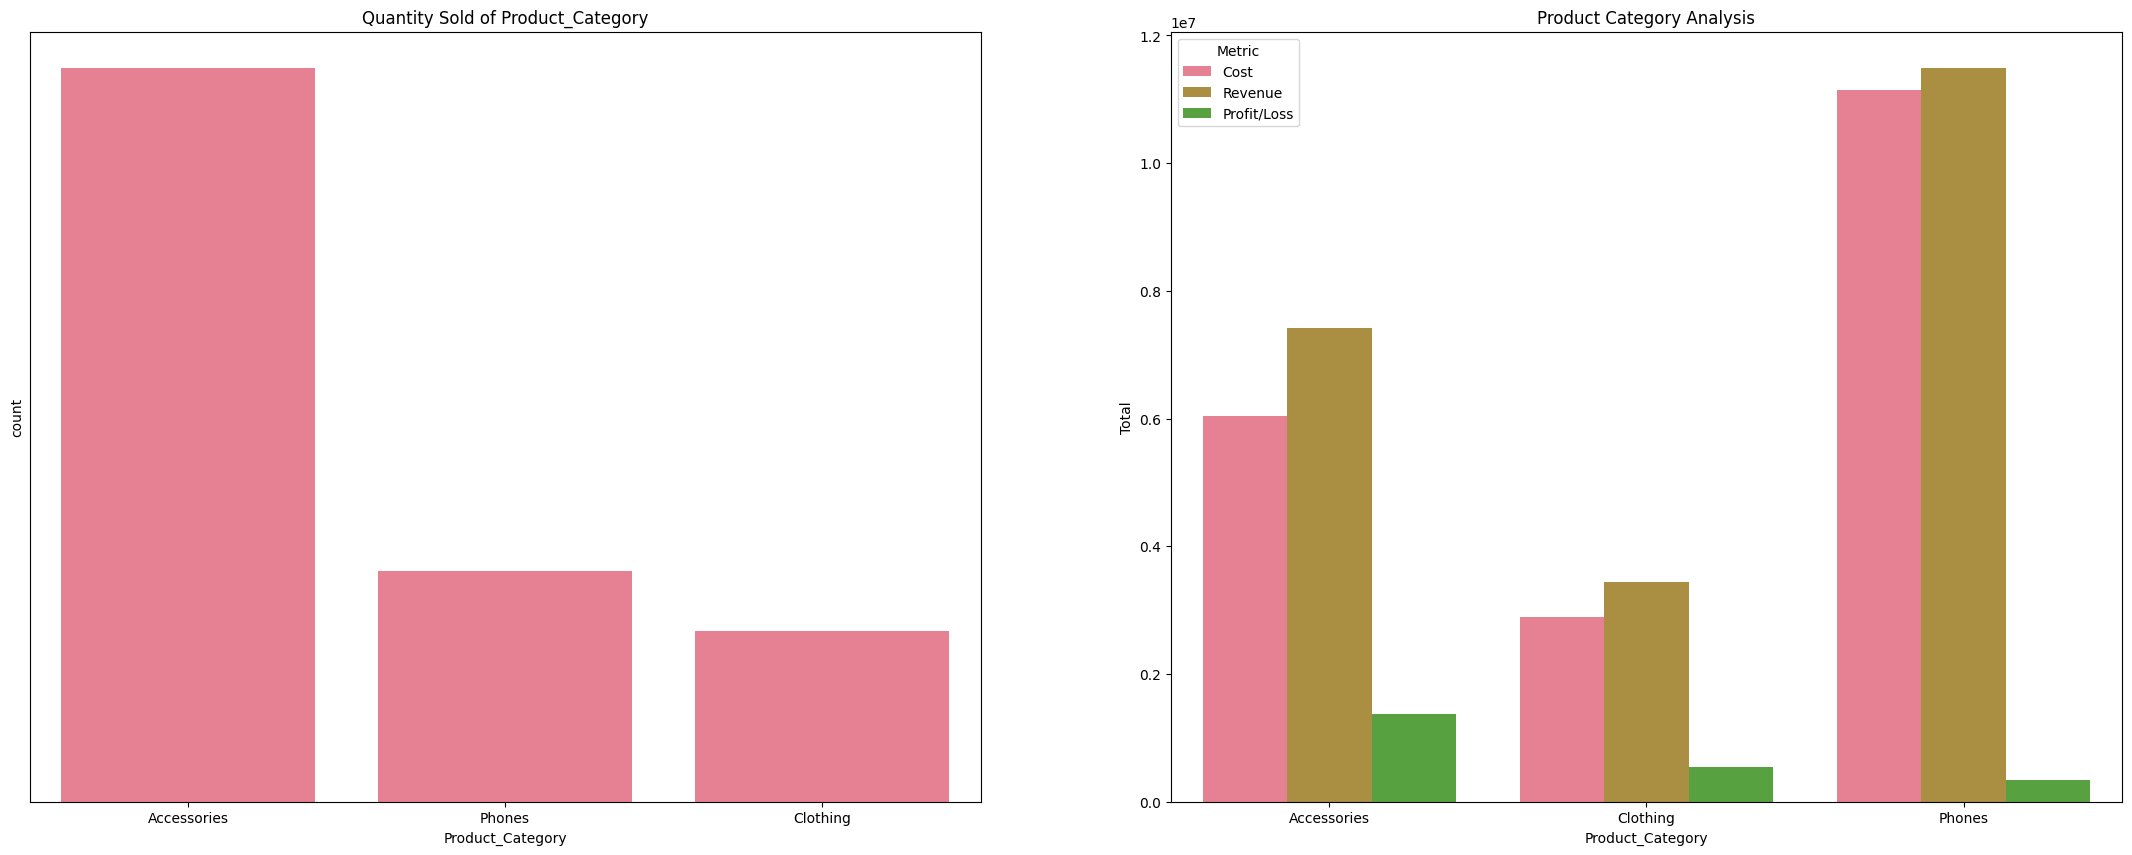

In [187]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(27,10))

pdt_count = data['Product_Category'].value_counts()
sns.countplot(x=data['Product_Category'], order=data['Product_Category'].value_counts().index, ax=axs[0])
axs[0].bar_label(container=ax.containers[0], labels=data['Product_Category'].value_counts().values)
axs[0].set_title('Quantity Sold of Product_Category')
axs[0].yaxis.set_ticks([])

sns.barplot(data=procat, x='Product_Category', y='Total', hue='Metric', ax=axs[1])
axs[1].set_title('Product Category Analysis');

Accessories have the highest total cost, revenue, and profit among the three product categories.Phones have the second highest total cost, revenue, and profit/loss.
Clothing has the lowest total cost, revenue, and profit.

For each product category, revenue is generally higher than cost, resulting in positive profit values. This indicates that the business is making a profit across all product categories.

Accessories have the highest profitability among the three product categories, with the highest total profit. Phones have the second highest profitability, followed by Clothing.

The total quantity ordered varies significantly across product categories, with Accessories having the highest quantity ordered, followed by Phones and then Clothing. Despite Accessories having the highest quantity ordered, Phones have a higher total revenue, indicating potentially higher-priced items in the Phones category.

In [180]:
procat

,Product_Category,Metric,Total
0,Accessories,Cost,6041896.06
1,Clothing,Cost,2892324.94
2,Phones,Cost,11148745.02
3,Accessories,Revenue,7420663.12
4,Clothing,Revenue,3437556.95
5,Phones,Revenue,11486354.63
6,Accessories,Profit/Loss,1378767.06
7,Clothing,Profit/Loss,545232.01
8,Phones,Profit/Loss,337609.61


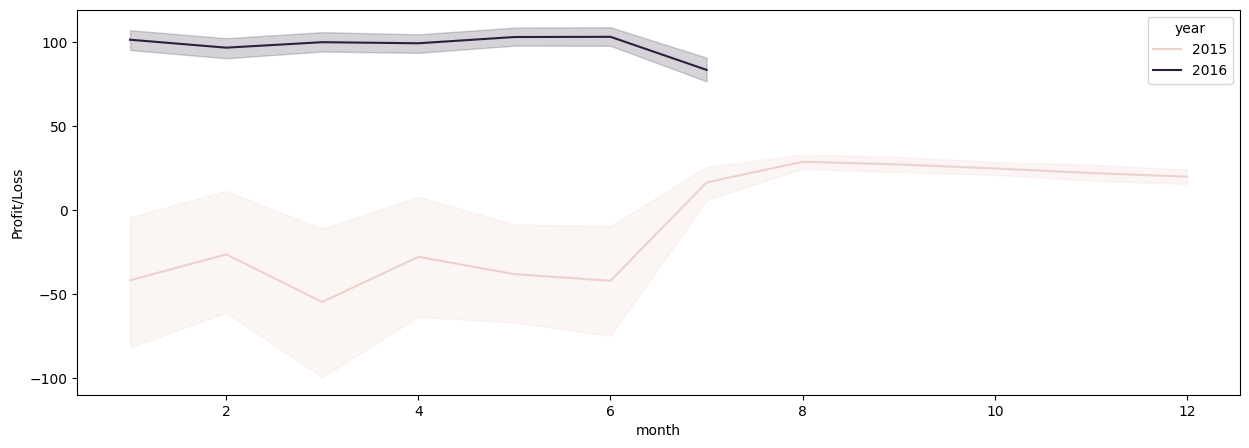

In [194]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='Profit/Loss', data=data, hue='year');

In 2015, the revenue starts with negative values between January to June before turning positive in July. From July onwards, there's a general upward trend in revenue, and then a steady decline as the year progresses.
In 2016, the revenue starts with positive values and shows a generally increasing trend but a sharp decrease was observed in the month of June.

Both years exhibit seasonal variations in revenue, with positive peaks occurring at different times each year; June - 2016 and August - 2016.

In [196]:
# Pivot Table
data.pivot_table(values='Profit/Loss', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Customer_Gender', ylabel='Profit/Loss'>

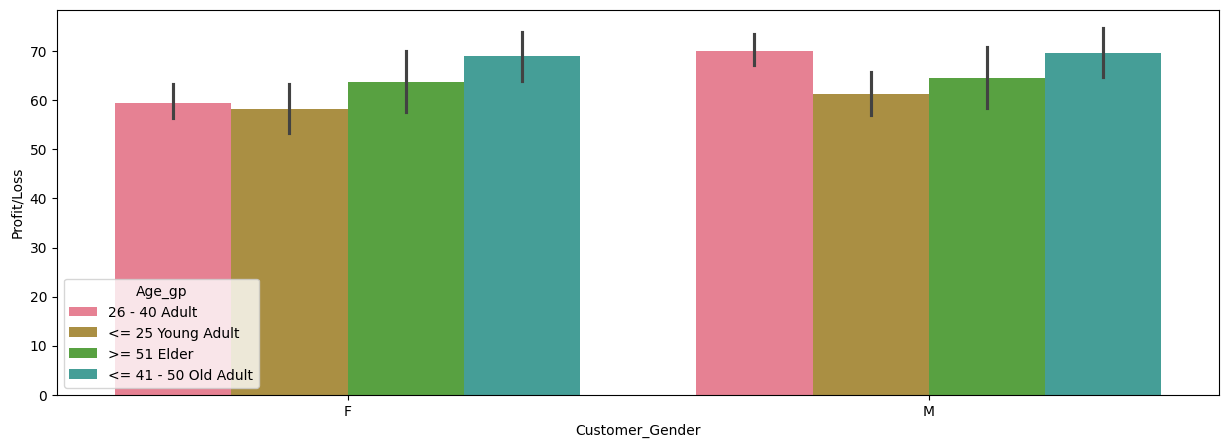

In [198]:
# # customer gender, age gp, profit
plt.figure(figsize=(15,5))
sns.barplot(x='Customer_Gender', y='Profit/Loss', data=data, hue='Age_gp')

Female gender: Old Adult had the highest count with the least being the young adult age group
Male gender: The adult age group had the highest count while the least age group count was young adult

The young adult age group had the least count for both gender.

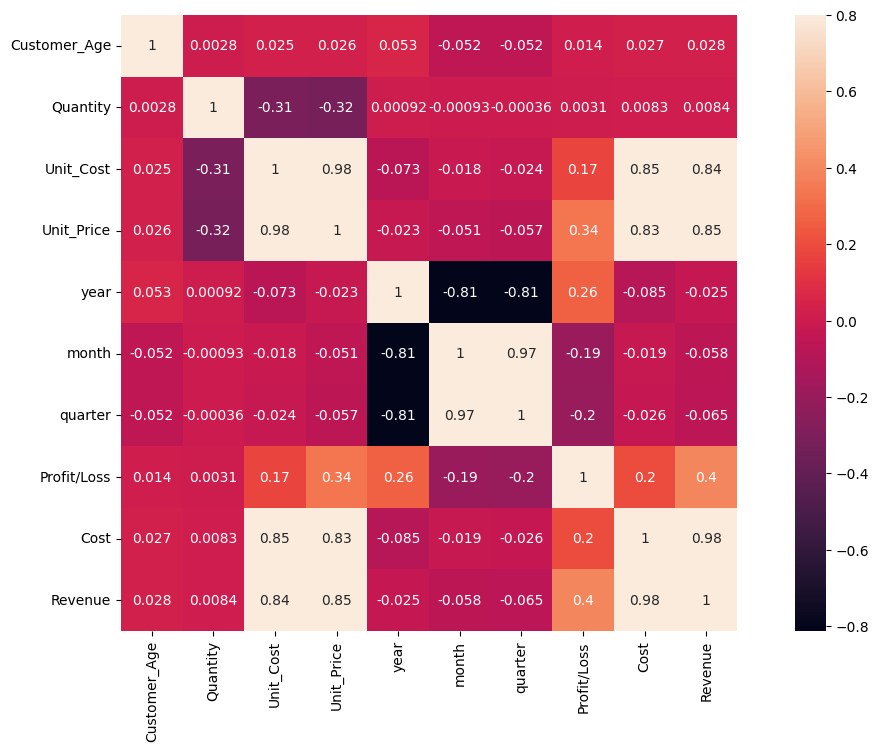

In [205]:
# correlation
num_data = data.select_dtypes(include=['number'])
a = num_data.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


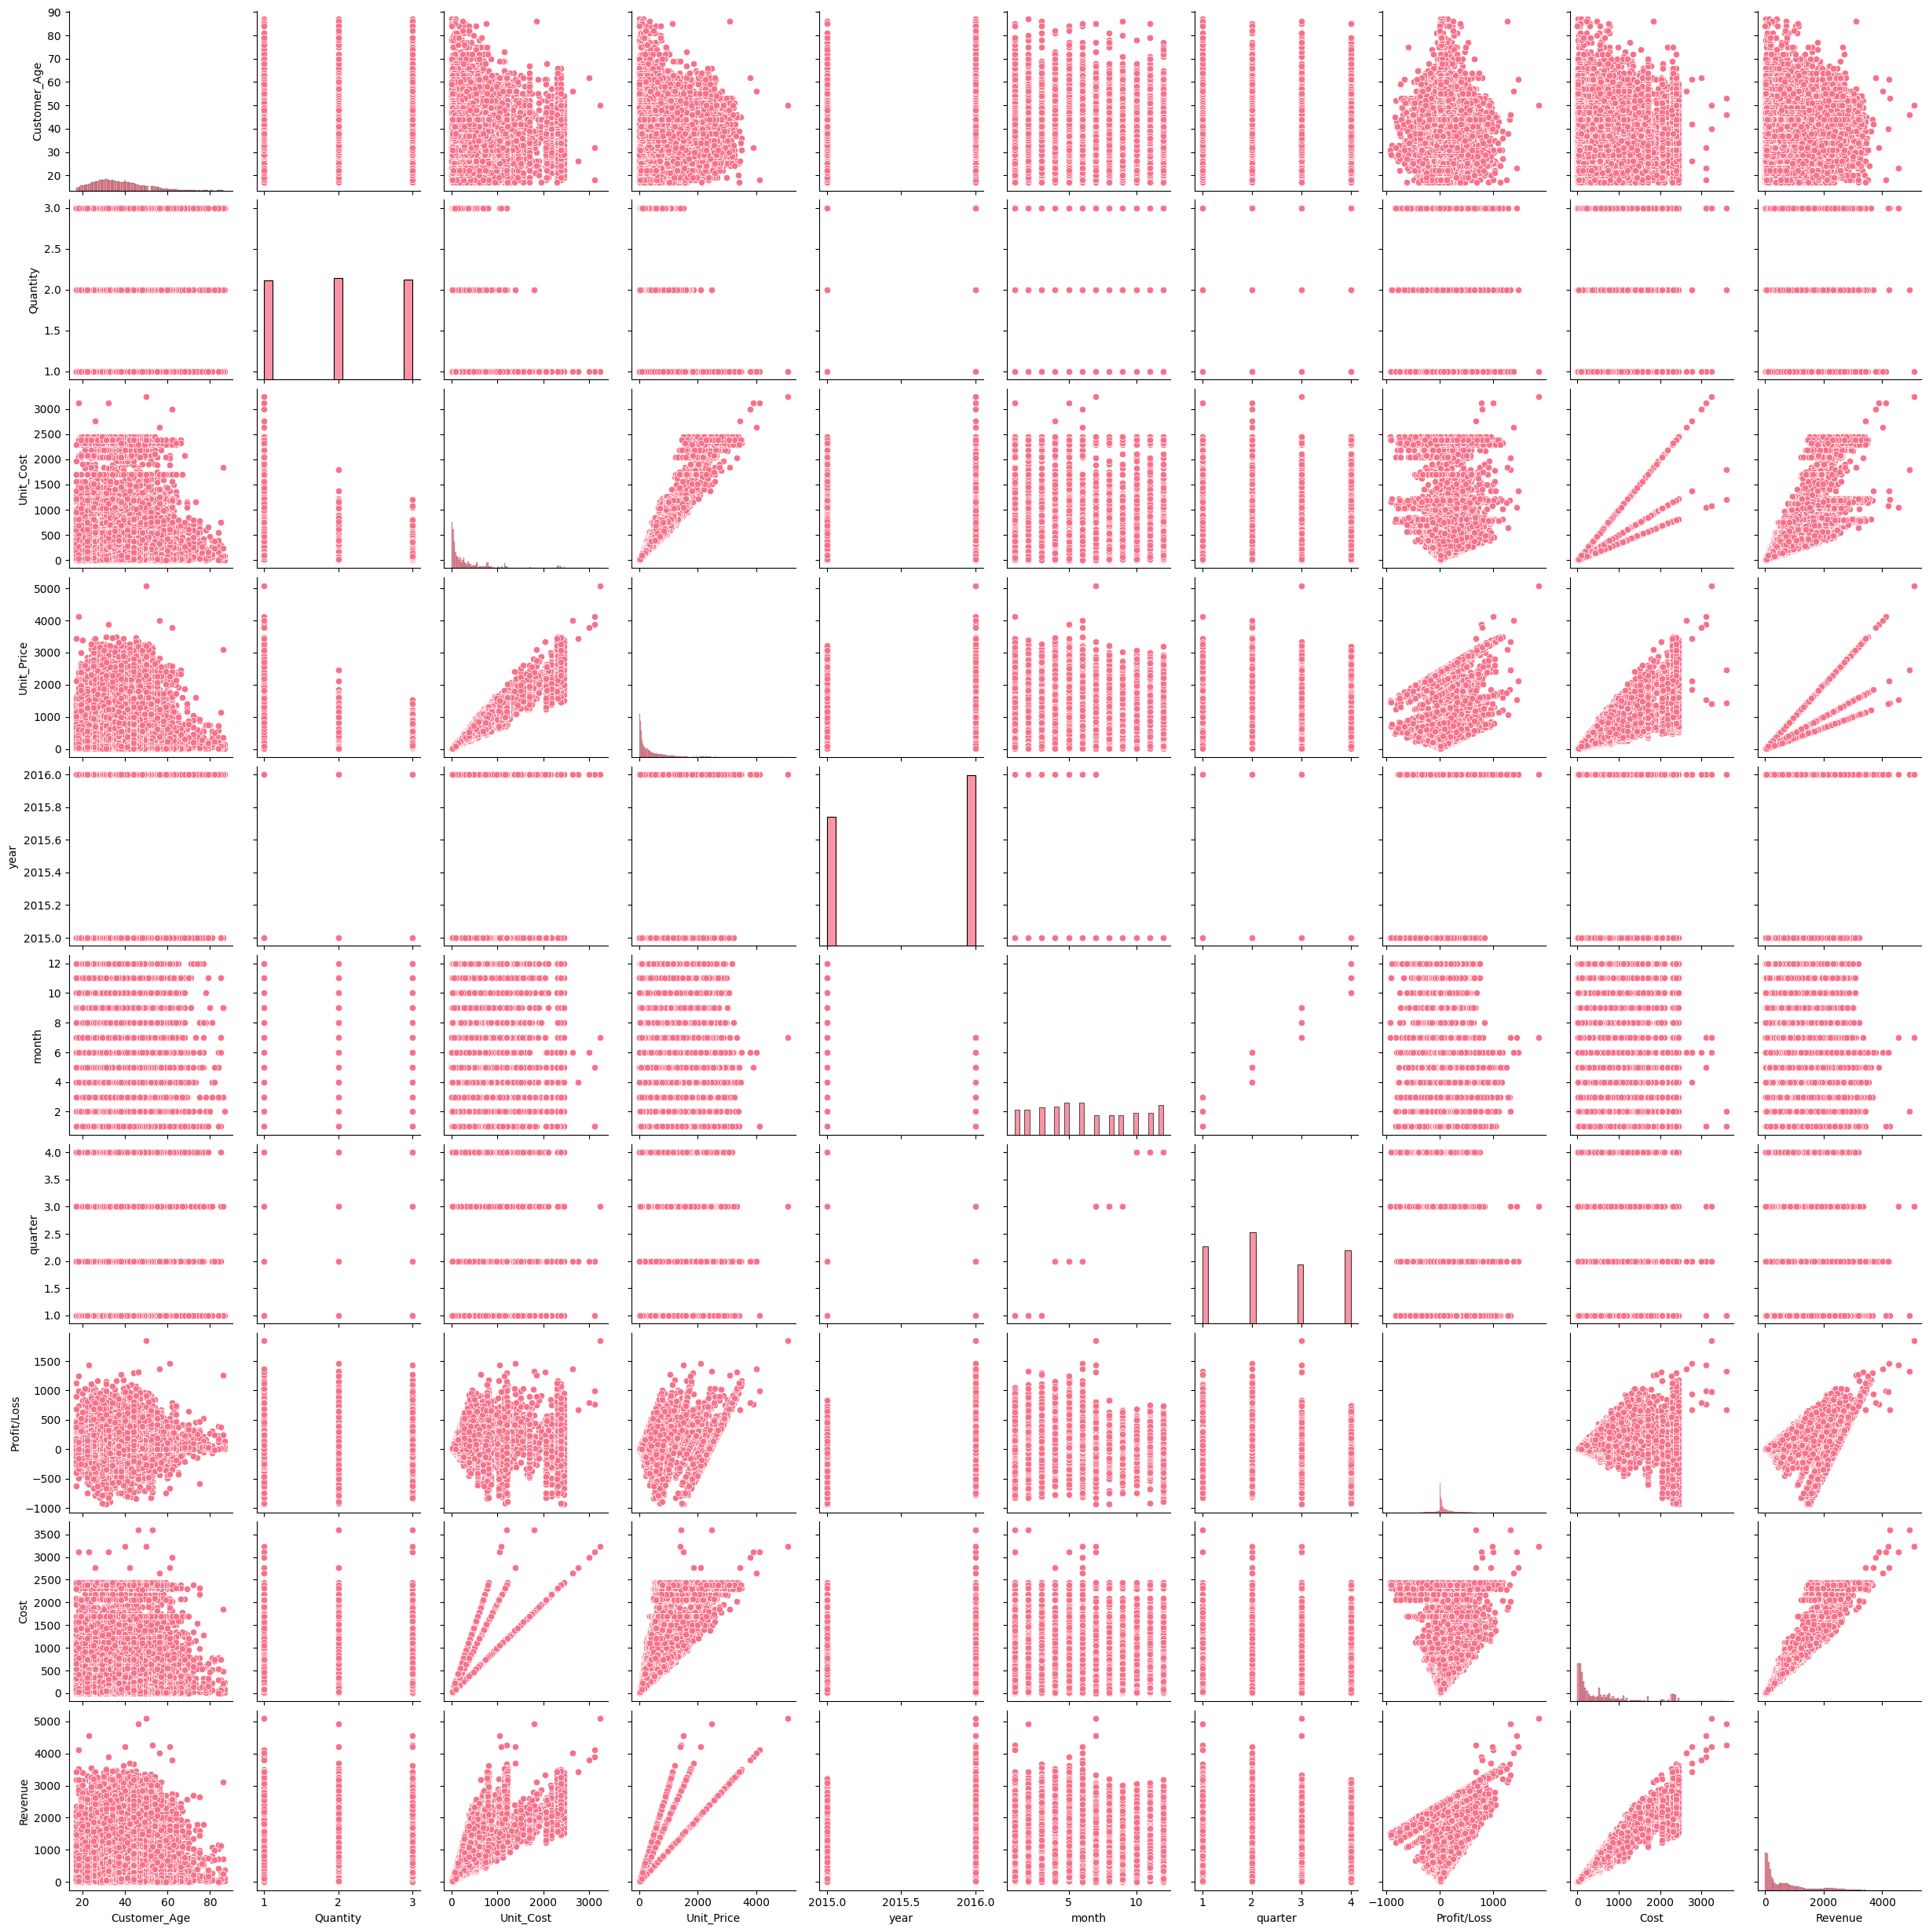

In [206]:
sns.pairplot(data, size=2.5);

In [207]:
"""
import warnings
warnings.filterwarnings('ignore')
"""

"\nimport warnings\nwarnings.filterwarnings('ignore')\n"